# Part B: Build a wine quality prediction model using K-NN
## Determine efficacy of PCA

In [10]:
# Imports....the usual suspects
import postgresql
import pandas as pd
import numpy as np
import sklearn
import matplotlib
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

## 1. Download the Wine Quality Dataset from the UCI
http://archive.ics.uci.edu/ml/datasets/Wine+Quality
Look for the 'Data Folder' link near top

In [4]:
df = pd.read_csv('~/Documents/Machine_Learning/LAB/Week4/winequality-red.csv', sep= ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. Split the Red Wine Dataset into training and testing

In [5]:
X_df = df.drop(columns=['quality'])    
y_df = df[['quality']]  

In [7]:
red_x_train, red_x_test, red_y_train, red_y_test = train_test_split(X_df, y_df, random_state=555)

## 3. Build a K-NN Regression Model to predict the continuous quality variable in the Red Wine Dataset.  Predict for your test set (you're estimating quality column)

Hint, you may want to drop the last element of your test set if it's a giant array: red_y_test[:-1]

In [8]:
knn_regressor = KNeighborsRegressor(11)
knn_regressor.fit(red_x_train, red_y_train)
print('Accuracy: {:.2f}'.format(knn_regressor.score(red_x_test, red_y_test)))

Accuracy: 0.19


## 4. What is the mean of the differences between the Y actuals (quality column) and your rounded predictions?

In [11]:
reg_predict = knn_regressor.predict(red_x_test)
absolute_differences = np.abs(red_y_test - reg_predict)
mean_absolute_difference = np.mean(absolute_differences)
mean_absolute_difference

/Users/payal/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


quality    0.568409
dtype: float64

## 5. Repeat steps 2-5 after applying PCA to the data. 

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(red_x_train)

PCA(n_components=2)

In [14]:
x_pca = pca.transform(red_x_train)
x_pca_test = pca.transform(red_x_test)

In [15]:
print("Original shape: {}".format(str(red_x_train.shape)))
print("Reduced shape: {}".format(str(x_pca.shape)))

Original shape: (1199, 11)
Reduced shape: (1199, 2)


In [16]:
clf = KNeighborsRegressor()
clf.fit(x_pca, red_y_train)

KNeighborsRegressor()

In [17]:
red_y_results = pandas.DataFrame(red_y_test)
red_y_results['prediction'] = clf.predict(x_pca_test)
red_y_results['pred_rounded'] = red_y_results['prediction'].round().astype(int)
red_y_results['error'] = red_y_results['pred_rounded'] - red_y_results['quality']

In [18]:
red_y_results['error'].abs().mean()

0.61

## 6. Did PCA help accuracy?

In [33]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

## 1. Import IRIS dataset

In [29]:
iris1 = datasets.load_iris()
iris1

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [31]:
# Create a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Species'] = iris.target_names[iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. Plot sepal width vs sepal length

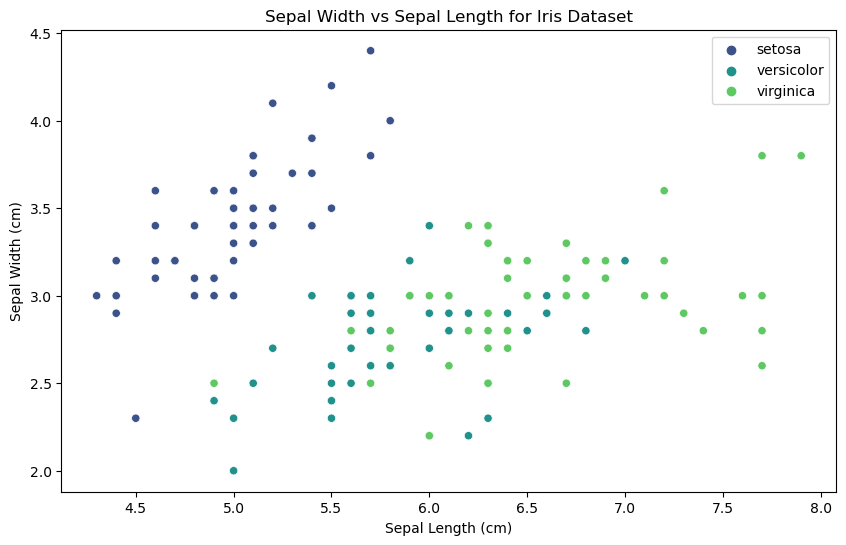

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='Species', data=iris_df, palette="viridis")

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Width vs Sepal Length for Iris Dataset')

plt.legend(loc='best')
plt.show()

## 3. Create a KMeans Clustering model and fit to IRIS data

In [38]:
from sklearn.cluster import KMeans
x = iris.data

kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

## 4. What are resulting the cluster centers ?

In [40]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


## 5. Plot the clustered data.

In [47]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color=kmeans.labels_)
fig.show()